# What was the impact of the COVID-19 pandemic on the level of home court advantage?

- Question 1: How has the difference in win-loss ratio between home and away teams changed from the 2019-20 season to the 2022-23 season? (wl_home and wl_away columns in game table)
- Question 2: How has the difference in average points scored between home and away teams changed from the 2019-20 season to the 2022-23 season? (pts_home and pts_away columns in game table)
- Question 3: How has the difference in offensive and defensive rebounds between home and away teams changed from 2019-20 to 2022-23?(oreb_home, oreb_away, dreb_home, dreb_away in the game table)
- Question 4: How does the average number of three-point field goals made by home teams compare to that of away teams from the 2019-20 season to the 2022-23 season? (fg3_pct_home and fg3_pct_away columns in game table)
- Question 5: How does the free throw percentage of home teams compare to that of away teams from the 2019-20 season to the 2022-23 season? (ft_pct_home and ft_pct_away in the game table)

#### Introduction
Our team will be analyzing NBA dataset to observe the difference between points for home and away teams during the COVID-19 (2019-2020) and post-COVID (2022-2023) seasons. The goal of this analysis is to explore how the COVID-19 pandemic impacted team performance and to examine how home court advantage may have changed as a result.

#### Context
COVID-19 is an infectious disease caused by the SARS-CoV-2 virus. It was first identified in December 2019 in Wuhan, China. The Centers for Disease Control and Prevention (CDC) announced the disease's outbreak in the United States in January 2020.

COVID-19 is highly contagious and spreads primarily through person-to-person transmission. Infection can occur from respiratory droplets by an infected person when coughing or sneezing, or through contact with contaminated surfaces. The virus's high transmissibility, combined with severe cases requiring hospitalization and a rising fatality rate, led to the declaration of a pandemic on March 11, 2020. Governments and health organizations implemented public health measures such as lockdowns, social distancing, and mask mandates to control the virus's spread.

Home court advantage in the NBA refers to the boost teams experience when playing in their home arena. The boost comes from the support from fans and this can motivate players performance. However, during the COVID-19 pandemic, the NBA banned fans from attending games in person, potentially reducing the magnitude of home court advantage. The following charts are designed to help the NBA and its stakeholders determine whether that reduction actually happened and plan next steps as the league returns to normal operations.

In [67]:
import pandas as pd
import sqlite3
import seaborn as sns
import matplotlib.pyplot as plt

con = sqlite3.connect("data/nba.sqlite")
con_reading = pd.read_sql_query('SELECT * FROM game', con)

#### Question 1: How has the difference in win-loss percentage between home and away teams changed from the 2019-20 season to the 2022-23 season? (wl_home and wl_away columns in game table)

/var/folders/6w/z6p8sp3s2mbf3s362f6y845c0000gn/T/ipykernel_5408/3981507834.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  covid_wl = covid_wl.replace('L', 0)
/var/folders/6w/z6p8sp3s2mbf3s362f6y845c0000gn/T/ipykernel_5408/3981507834.py:27: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['home', 'away'], fontsize=10)


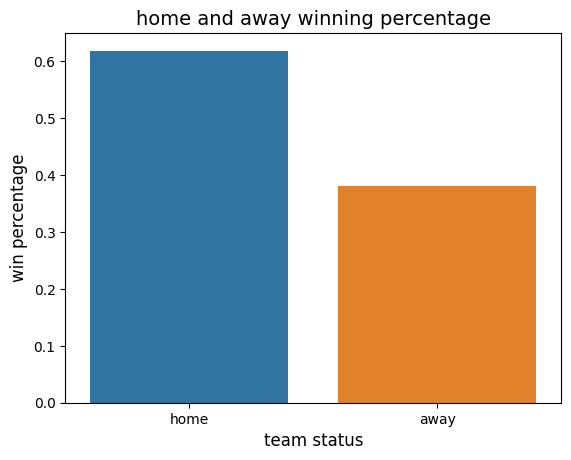

In [68]:
covid_wl = pd.read_sql_query("SELECT wl_home, wl_away, season_id FROM game WHERE season_id", con)
covid_wl = covid_wl.replace('W', 1)
covid_wl = covid_wl.replace('L', 0)

count_win = 1

# calculating the winning percentage of home and away game
def winning_percentage(game_column):
    game_list = covid_wl[game_column].to_list()
    total = len(game_list)
    win = game_list.count(count_win)
    return win / total

# home winning percentage
home_game = winning_percentage('wl_home')
# away winning percentage
away_game = winning_percentage('wl_away')

home_away_winning_percentage = {'Home Winning Percentage': [home_game],
                            'Away Winning Percentage': [away_game]}
home_away_winning_percentage = pd.DataFrame(home_away_winning_percentage)
home_away_winning_percentage
ax = sns.barplot(data=home_away_winning_percentage)
ax.set_title('home and away winning percentage', fontsize=14)
ax.set_xlabel('team status', fontsize=12)
ax.set_ylabel('win percentage', fontsize=12)
ax.set_xticklabels(['home', 'away'], fontsize=10)
plt.show()

#### Question 2: How has the difference in average points scored between home and away teams changed from the 2019-20 season to the 2022-23 season? (pts_home and pts_away columns in game table)

             pts_home
season_id            
22019      112.863078
22020      112.562963
22021      111.477236
22022      115.935772


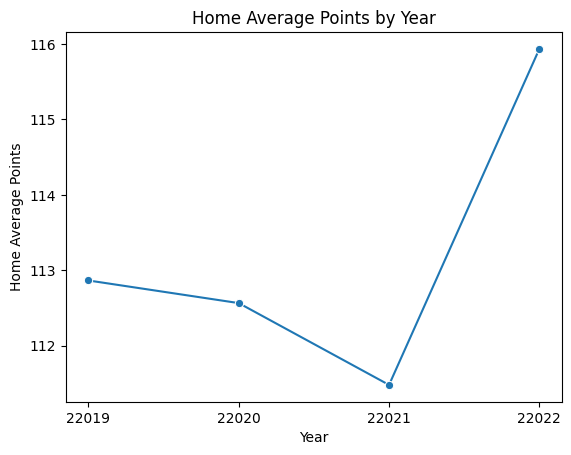

In [69]:
covid_wl = pd.read_sql_query("SELECT pts_home, pts_away, season_id FROM game WHERE season_id IN ('22019', '22020','22021', '22022')", con)
covid_wl = covid_wl.replace('W', 1)
covid_wl = covid_wl.replace('L', 0)


mean_pts_home = covid_wl.groupby('season_id').agg({
    'pts_home': 'mean'
})
print(mean_pts_home)
sns.lineplot(x=mean_pts_home.index, y=mean_pts_home['pts_home'], marker='o')
# Adding labels and title
plt.xlabel('Year')
plt.ylabel('Home Average Points')
plt.title('Home Average Points by Year')

# Show the plot
plt.show()

             pts_away
season_id            
22019      110.732767
22020      111.619444
22021      109.754472
22022      113.435772


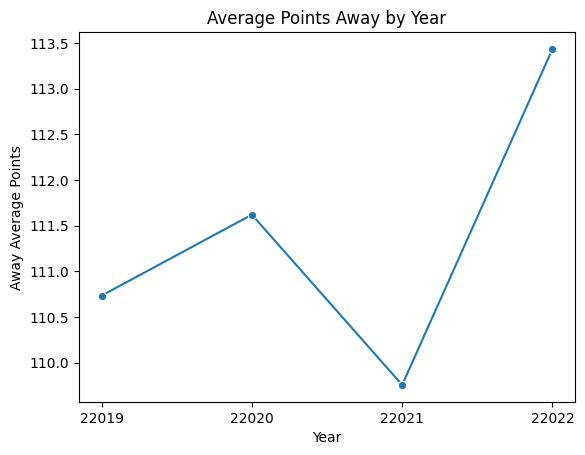

In [70]:
covid_wl = pd.read_sql_query("SELECT pts_home, pts_away, season_id FROM game WHERE season_id IN ('22019', '22020','22021', '22022')", con)
covid_wl = covid_wl.replace('W', 1)
covid_wl = covid_wl.replace('L', 0)


mean_pts_away = covid_wl.groupby('season_id').agg({
    'pts_away': 'mean'
})
print(mean_pts_away)
sns.lineplot(x=mean_pts_away.index, y=mean_pts_away['pts_away'], marker='o')

# Adding labels and title
plt.xlabel('Year')
plt.ylabel('Away Average Points')
plt.title('Average Points Away by Year')

# Show the plot
plt.show()

Rising: Home winning percentage overall within the season shows that home team has the highest winning percentage dispute during COVID years. In the line graphs, you will see that COVID-19 caused a dip in lowest amount of average points in 2021, but home team still wins by a 1.73 point difference. COVID impact home team usual amount of points as you can see in the line graph during the COVID years average scores were gradually decreasing and the spike during 2021-2022 years show that the COVID-19 pandemic did impact the home score advantage.

#### Question 3: How has the difference in offensive and defensive rebounds between home and away teams changed from 2019-20 to 2022-23?(oreb_home, oreb_away, dreb_home, dreb_away in the game table)

           oreb_home  dreb_home
season_id                      
22019      10.253069  35.281398
22020       9.888889  34.830556
22021      10.378049  34.377236
22022      10.469106  33.421951
           oreb_away  dreb_away
season_id                      
22019       9.898017  34.234183
22020       9.770370  34.108333
22021      10.290244  33.854472
22022      10.400000  32.585366


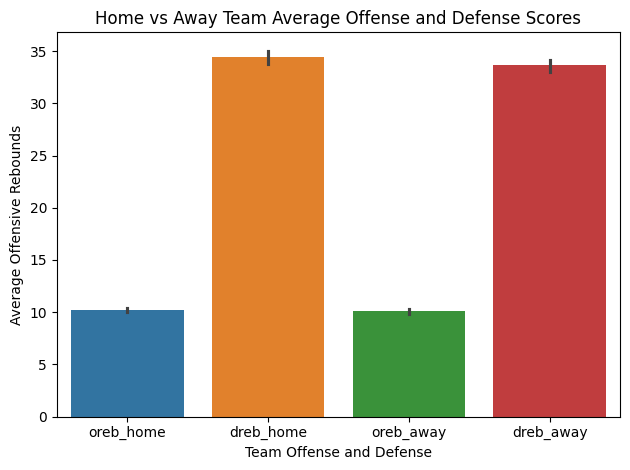

In [71]:
covid_wl = pd.read_sql_query("SELECT oreb_home, oreb_away, dreb_home, dreb_away, season_id FROM game WHERE season_id IN ('22019', '22020','22021', '22022')", con)
covid_wl = covid_wl.replace('W', 1)
covid_wl = covid_wl.replace('L', 0)

home_od = covid_wl.groupby('season_id').agg({
    'oreb_home': 'mean',
    'dreb_home': 'mean'
})
away_od = covid_wl.groupby('season_id').agg({
    'oreb_away': 'mean',
    'dreb_away': 'mean'
})
print(home_od)
print(away_od)
# Combine both DataFrames into one
df = pd.concat([home_od, away_od], axis=0)
sns.barplot(data=df)
plt.title('Home vs Away Team Average Offense and Defense Scores')
plt.xlabel('Team Offense and Defense')
plt.ylabel('Average Offensive Rebounds')
plt.tight_layout()
plt.show()

Climax: As you can see in the bar plots, home team overall does the best in offense and defense scores compare to away team due to still having an advantage in the home score advantage. In the visualization, they are very similar in height but if you look at the scores, home team each season has a higher average than the away team.

#### Question 4: How does the average number of three-point field goals made by home teams compare to that of away teams from the 2019-20 season to the 2022-23 season? (fg3_pct_home and fg3_pct_away columns in game table)

     season_id  season_fg3_home_med
0        22019                0.361
1        22019                0.361
2        22019                0.361
3        22019                0.361
4        22019                0.361
...        ...                  ...
4594     22022                0.364
4595     22022                0.364
4596     22022                0.364
4597     22022                0.364
4598     22022                0.364

[4599 rows x 2 columns]


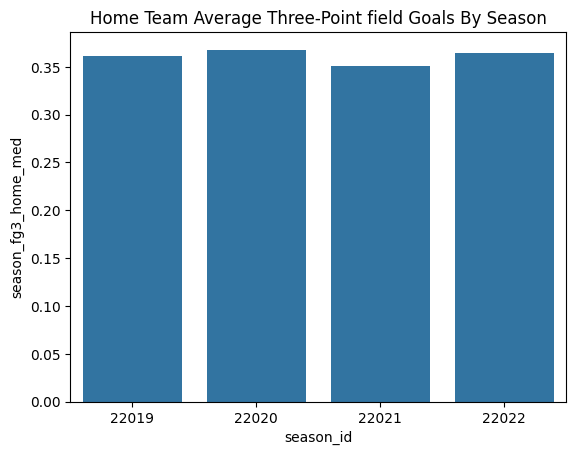

In [72]:
covid_wl = pd.read_sql_query("SELECT fg3_pct_home, fg3_pct_away, season_id FROM game WHERE season_id IN ('22019', '22020','22021', '22022')", con)
covid_wl = covid_wl.replace('W', 1)
covid_wl = covid_wl.replace('L', 0)

covid_wl["season_fg3_home_med"] = covid_wl.groupby("season_id")["fg3_pct_home"].transform(lambda x: x.median())
print(covid_wl[["season_id", "season_fg3_home_med"]])
sns.barplot(data=covid_wl, x='season_id', y='season_fg3_home_med')
plt.title('Home Team Average Three-Point field Goals By Season')
plt.show()

     season_id  season_fg3_away_med
0        22019               0.3540
1        22019               0.3540
2        22019               0.3540
3        22019               0.3540
4        22019               0.3540
...        ...                  ...
4594     22022               0.3505
4595     22022               0.3505
4596     22022               0.3505
4597     22022               0.3505
4598     22022               0.3505

[4599 rows x 2 columns]


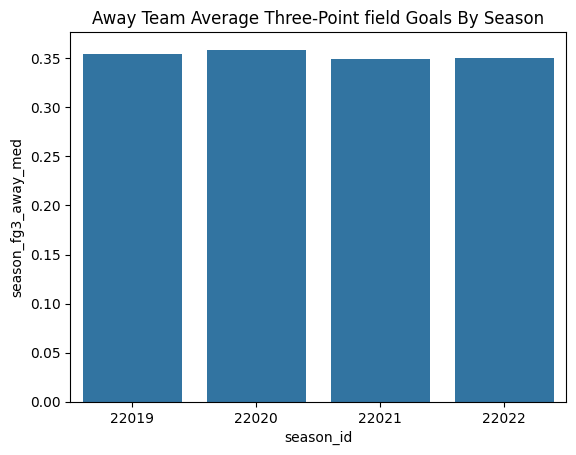

In [73]:
covid_wl = pd.read_sql_query("SELECT fg3_pct_home, fg3_pct_away, season_id FROM game WHERE season_id IN ('22019', '22020','22021', '22022')", con)
covid_wl = covid_wl.replace('W', 1)
covid_wl = covid_wl.replace('L', 0)

covid_wl["season_fg3_away_med"] = covid_wl.groupby("season_id")["fg3_pct_away"].transform(lambda x: x.median())
print(covid_wl[["season_id", "season_fg3_away_med"]])
sns.barplot(data=covid_wl, x='season_id', y='season_fg3_away_med')
plt.title('Away Team Average Three-Point field Goals By Season')
plt.show()

Failing: Home team three point field goals average is highest than away team through the season. In 2019, home team score a 3.6 while away team score a 3.54 which is a .06 difference between the score. Home team seems to always have a highest score between the team dispute the COVID pandemic affecting the home court advantage. You can see that it cause a decrease in average score during the 2021-2022 period of the pandemic but overall compare to home and away team, home team always wins.

#### Question 5: How does the free throw percentage of home teams compare to that of away teams from the 2019-20 season to the 2022-23 season? (ft_pct_home and ft_pct_away in the game table)

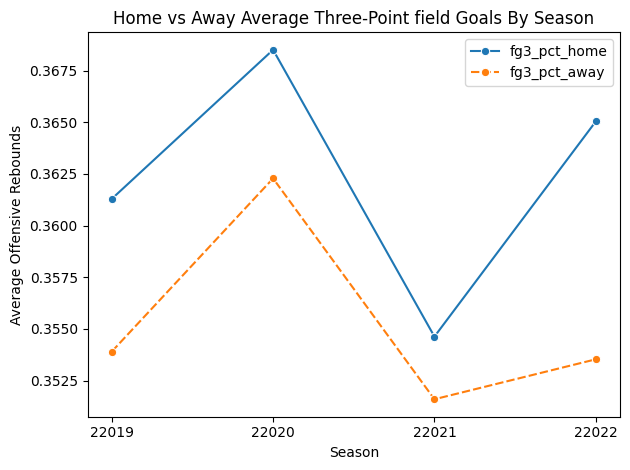

In [74]:
covid_wl = pd.read_sql_query("SELECT fg3_pct_home, fg3_pct_away, season_id FROM game WHERE season_id IN ('22019', '22020','22021', '22022')", con)
covid_wl = covid_wl.replace('W', 1)
covid_wl = covid_wl.replace('L', 0)

home_fg3 = covid_wl.groupby('season_id').agg({
    'fg3_pct_home': 'mean'
})
away_fg3 = covid_wl.groupby('season_id').agg({
    'fg3_pct_away': 'mean'
})

# Combine both DataFrames into one
df = pd.concat([home_fg3, away_fg3], axis=0)

sns.lineplot(df, marker='o')

plt.title('Home vs Away Average Three-Point field Goals By Season')
plt.xlabel('Season')
plt.ylabel('Average Offensive Rebounds')
plt.tight_layout()
plt.show()

Conclusion: Dispute the COVID-pandemic generally causing a slight decrease in scores for the home team, the score generally show that home court advantage is still present and overall home team had the highest scores when comparing the averages between scores throughout the season.